<a href="https://colab.research.google.com/github/stonewallmhk/Datascience/blob/master/WHO_Airquality_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform an exploratory data analysis on global air quality data to identify patterns, trends, and potential correlations between air pollution levels and public health outcomes. Analyze various pollutants (PM2.5, PM10, NO2, etc.) across different cities and regions to understand the factors contributing to poor air quality and its potential health impacts.

Data URL:[WHO Air Quality Dataset_Jan_2024](https://www.who.int/publications/m/item/who-ambient-air-quality-database-(update-jan-2024))

--- Values Guidline ---
https://www.who.int/teams/environment-climate-change-and-health/air-quality-and-health/health-impacts/types-of-pollutants
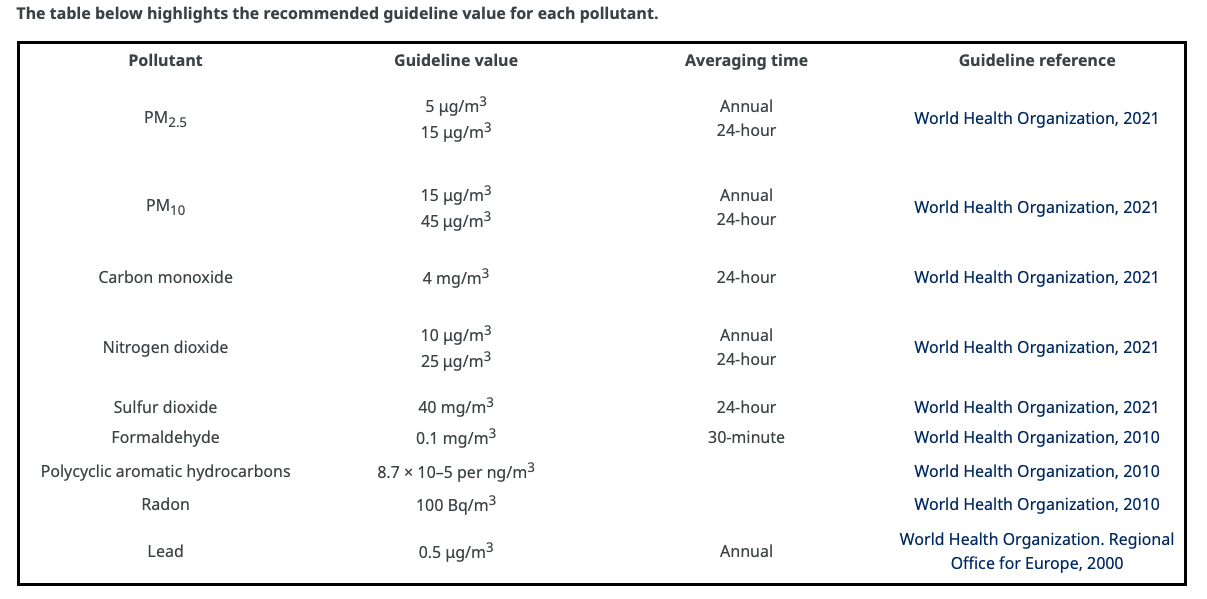

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# prompt: increase output row length to extend to screen

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 900)

In [3]:
# prompt: do not show any warnings

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Connect to google drive

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
# import data
filename = '/content/drive/MyDrive/Data/AirQuality_WHO_012024.csv'
data = pd.read_csv(filename)
data.shape

(40098, 20)

In [6]:
data.columns

Index(['who_region', 'iso3', 'country_name', 'city', 'year', 'version', 'pm10_concentration', 'pm25_concentration', 'no2_concentration', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov', 'type_of_stations', 'reference', 'web_link', 'population', 'population_source', 'latitude', 'longitude', 'who_ms'], dtype='object')

### Column Description


* who_region: WHO region classification
* iso3: Country code
* country_name
* city
* year: year of data
* version: Version of WHO database
* pm10_concentration: Annual mean concentration of Particle Matter 10
* pm25_concentration: Annual mean concentration of Particle Matter 2.5
* no2_concentration: Annual mean concentration of NO2
* _tempcov: Percentage of year for which data was measured. pm10_tempcov = 1 , means 1% of the year
*   remaining columns are not considered in this analysis



In [7]:
data.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,46.0,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,88.0,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,71.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,98.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,97.0,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1


In [ ]:
# prompt: change the who_region values as: 1_Afr to African; 2_Amr to Americas; 3_Sear to South_East_Asian; 4_Eur to Eurupean; 5_Emr to Eastern_Mediterranean; 6_Wpr to Western_Pacific; 7_NonMS to Non_member

data['who_region'] = data['who_region'].replace({
    '1_Afr': 'African',
    '2_Amr': 'Americas',
    '3_Sear': 'South_East_Asian',
    '4_Eur': 'Eurupean',
    '5_Emr': 'Eastern_Mediterranean',
    '6_Wpr': 'Western_Pacific',
    '7_NonMS': 'Non_member'
})


## Descriptive Analysis:
1. Descriptive Analysis Questions:

* What is the average level of PM10, PM2.5, and NO2 across different cities and countries?
* Which cities or countries have the highest and lowest average concentrations of PM10, PM2.5, and NO2?
* What is the distribution of air quality measurements (PM10, PM2.5, NO2) across different WHO regions?
* What is the proportion of cities or regions exceeding the WHO recommended air quality limits for PM10, PM2.5, and NO2?
* What is the range of temporal coverage (tempcov columns) for air quality measurements? Are there any patterns in temporal coverage across different regions or cities?

In [8]:
# understand data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40098 entries, 0 to 40097
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          40098 non-null  object 
 1   iso3                40098 non-null  object 
 2   country_name        40098 non-null  object 
 3   city                40098 non-null  object 
 4   year                40095 non-null  float64
 5   version             40098 non-null  object 
 6   pm10_concentration  28672 non-null  float64
 7   pm25_concentration  21730 non-null  float64
 8   no2_concentration   26934 non-null  float64
 9   pm10_tempcov        22403 non-null  float64
 10  pm25_tempcov        16590 non-null  float64
 11  no2_tempcov         23402 non-null  float64
 12  type_of_stations    23331 non-null  object 
 13  reference           6652 non-null   object 
 14  web_link            1790 non-null   object 
 15  population          22433 non-null  float64
 16  popu

In [9]:
# Descriptive analysis
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,40095.0,2016.232672,3.116678e+00,2010.000000,2014.00000,2016.000000,2019.000000,2.022000e+03
pm10_concentration,28672.0,30.016375,2.954857e+01,0.730000,16.26475,21.335500,30.515500,5.400000e+02
pm25_concentration,21730.0,19.130923,1.749003e+01,1.000000,8.60325,12.710500,23.000000,4.364400e+02
no2_concentration,26934.0,18.861620,2.584506e+01,0.002000,10.16325,16.700000,24.911500,3.670314e+03
pm10_tempcov,22403.0,88.732134,2.027727e+01,0.000000,90.00000,96.000000,99.000000,1.000000e+02
pm25_tempcov,16590.0,84.124533,2.681910e+01,0.000000,86.00000,96.000000,99.000000,1.000000e+02
no2_tempcov,23402.0,88.092214,2.314964e+01,0.000000,92.00000,96.000000,98.000000,1.000000e+02
population,22433.0,757193.080818,2.123730e+06,5.000000,53006.00000,163729.000000,590032.000000,3.739313e+07
latitude,40098.0,40.024341,1.630938e+01,-53.158316,37.13880,43.822900,49.163367,6.967750e+01
longitude,40098.0,10.598472,5.777499e+01,-159.366240,-1.25890,10.512933,23.226400,1.784500e+02


## Key Insights:
1.	General Overview:
	* The dataset contains 40,095 observations (rows) for the year column, indicating a time span from 2010 to 2022.
	* However, not all columns have complete data. For example, pm10_concentration has 28,672 observations, pm25_concentration has 21,730, and no2_concentration has 26,934, suggesting missing data.
2.	Air Pollution Levels:
  * PM10 and PM2.5 have high maximum values and large STD values which could indicate outliers
  * NO2 (Nitrogen Dioxide) has a maximum value which is exceptionally high, which could indicate a data entry error or a genuine extreme pollution event.
3.	Temporal Coverage (tempcov):
	* The tempcov columns (pm10_tempcov, pm25_tempcov, no2_tempcov) show the percentage of temporal coverage for each pollutant.
	* The mean temporal coverage is relatively high (88.7% for PM10, 84.1% for PM2.5, and 88.1% for NO2), but there are instances with 0% coverage.
	* Minimum values of 0% indicate that some records have no data for the year, which may affect the reliability of the averages.
5.	WHO Member States (who_ms):
	* The column appears to indicate whether a country is a WHO member state, with a mean of approximately 0.999, suggesting most data points belong to WHO member countries.


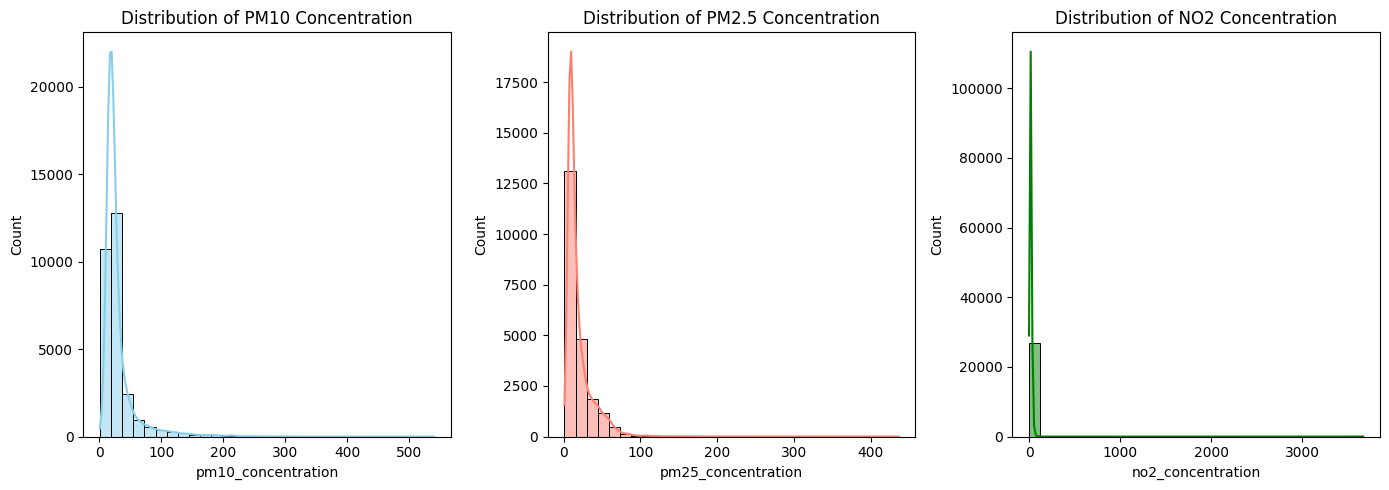

In [10]:
#Distribution Plots for Air Pollutant Levels

# Plot distributions for each pollutant concentration
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['pm10_concentration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of PM10 Concentration')

plt.subplot(1, 3, 2)
sns.histplot(data['pm25_concentration'], bins=30, kde=True, color='salmon')
plt.title('Distribution of PM2.5 Concentration')

plt.subplot(1, 3, 3)
sns.histplot(data['no2_concentration'], bins=30, kde=True, color='green')
plt.title('Distribution of NO2 Concentration')

plt.tight_layout()
plt.show()

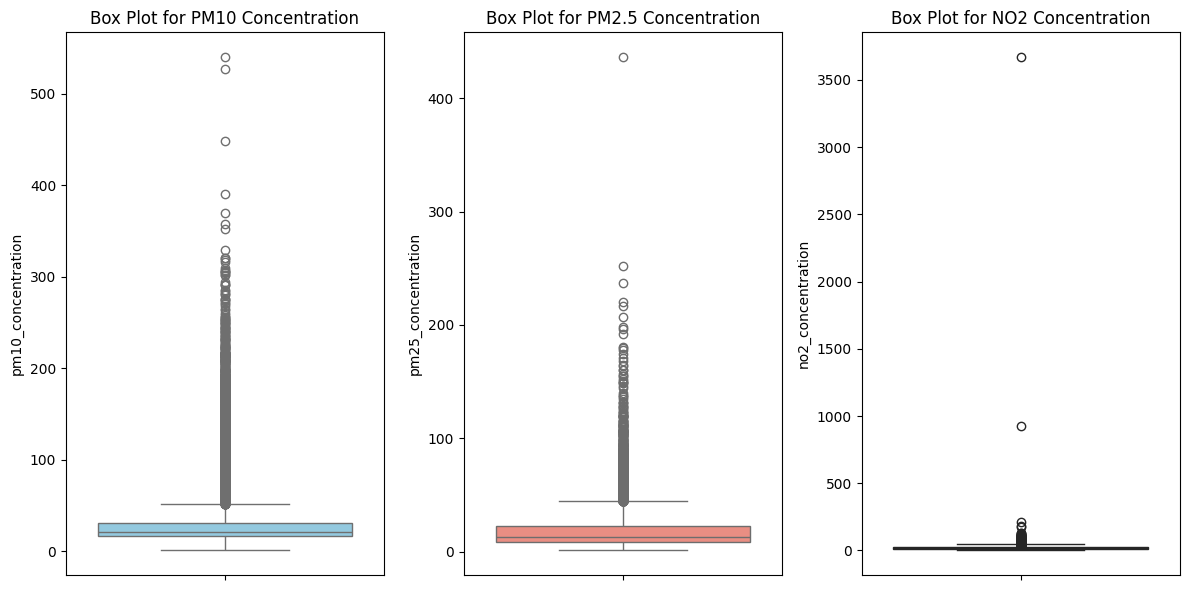

In [11]:
# Box Plots to Detect Outliers

# Plot box plots for each pollutant concentration
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=data['pm10_concentration'], color='skyblue')
plt.title('Box Plot for PM10 Concentration')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['pm25_concentration'], color='salmon')
plt.title('Box Plot for PM2.5 Concentration')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['no2_concentration'], color='green')
plt.title('Box Plot for NO2 Concentration')

plt.tight_layout()
plt.show()

**Outliers**\
* PM10 has outliers above the value 350
* PM25 has outlier above the value 300
* NO2 has outlier above the value 150

In [12]:
# Find rows for the outlier values

# for PM10
outliers = data[(data['pm10_concentration'] > 350) | (data['pm25_concentration'] > 300) | (data['no2_concentration'] > 150)]
print(outliers)

      who_region iso3                country_name               city    year                                   version  pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov        type_of_stations                                        reference                                           web_link  population                                  population_source   latitude  longitude  who_ms
369       3_Sear  IND                       India      Ahmedabad/IND  2017.0                               V5.0 (2022)                 NaN              436.44                NaN           NaN           NaN          NaN                     NaN                                              NaN                                                NaN   7342850.0                                       old database  22.996200  72.599600       1
1628       5_Emr  IRN  Iran (Islamic Republic of)           Arak/IRN  2012.0                  V4.0 (2018), V5.0 (2022)          

Check the values of the pollutant for outlier city for the year

In [13]:
# prompt: filter the main dataset where both city and year of each row in outliers matches

merged_df = pd.merge(data, outliers[['city', 'year']], on=['city', 'year'], how='inner')
print(merged_df)


   who_region iso3                country_name               city    year                                   version  pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov        type_of_stations                                        reference                                           web_link  population                                  population_source   latitude  longitude  who_ms
0      3_Sear  IND                       India      Ahmedabad/IND  2017.0                               V5.0 (2022)                 NaN              436.44                NaN           NaN           NaN          NaN                     NaN                                              NaN                                                NaN   7342850.0                                       old database  22.996200  72.599600       1
1       5_Emr  IRN  Iran (Islamic Republic of)           Arak/IRN  2012.0                  V4.0 (2018), V5.0 (2022)              20.08

-- These outliers values are replaced by average of all years for the city of each pollutant

In [14]:
# prompt: For pm25 values over 300, replace the value with mean value of the pollutant for that city. Repeat similar for pm10 over 400 and no2 over 500. When calculating the mean exclude the outlier values. If the mean is NULL, then delete the row from the dataset

def replace_outliers_with_city_mean(df, outlier_df, pollutant_col, outlier_threshold):
  """
  Replaces outlier values in a pollutant column with the mean value for that city,
  excluding the outlier values when calculating the mean.

  Args:
    df: The DataFrame containing the data.
    pollutant_col: The name of the pollutant column.
    outlier_threshold: The threshold above which values are considered outliers.

  Returns:
    The DataFrame with outlier values replaced by city means.
  """

  for city in outlier_df['city'].unique():
    city_data = df[df['city'] == city]
    outlier_rows = city_data[city_data[pollutant_col] > outlier_threshold]
    if not outlier_rows.empty:
      non_outlier_data = city_data[city_data[pollutant_col] <= outlier_threshold]
      city_mean = non_outlier_data[pollutant_col].mean()
      if not np.isnan(city_mean):
        df.loc[(df['city'] == city) & (df[pollutant_col] > outlier_threshold), pollutant_col] = city_mean
      else:
        df = df.drop(df[(df['city'] == city) & (df[pollutant_col] > outlier_threshold)].index)

  return df

data = replace_outliers_with_city_mean(data, outliers, 'pm25_concentration', 300)
data = replace_outliers_with_city_mean(data, outliers, 'pm10_concentration', 350)
data = replace_outliers_with_city_mean(data, outliers, 'no2_concentration', 150)
print(data.shape)

(40091, 20)


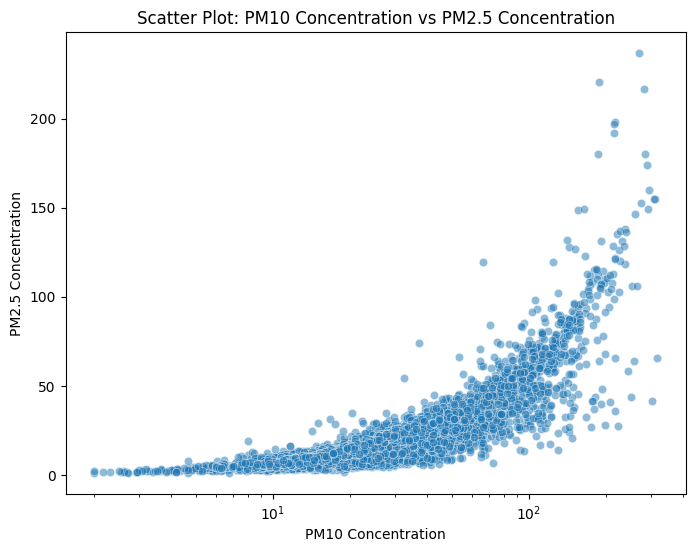

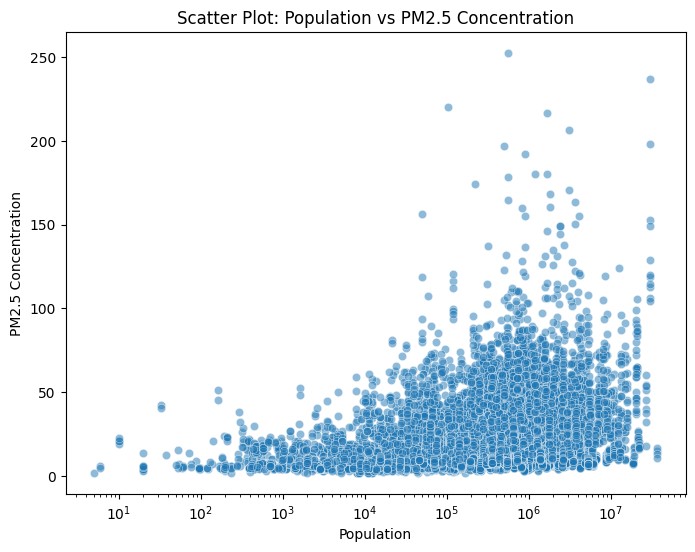

In [15]:
# Scatter plot between PM2.5 and PM10 concentrations

# Scatter plot between PM10 and PM2.5 concentrations
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['pm10_concentration'], y=data['pm25_concentration'], alpha=0.5)
plt.title('Scatter Plot: PM10 Concentration vs PM2.5 Concentration')
plt.xlabel('PM10 Concentration')
plt.ylabel('PM2.5 Concentration')
plt.xscale('log')  # Log scale to handle wide range of population values
plt.show()

# Scatter plot between population and PM2.5 concentrations
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['population'], y=data['pm25_concentration'], alpha=0.5)
plt.title('Scatter Plot: Population vs PM2.5 Concentration')
plt.xlabel('Population')
plt.ylabel('PM2.5 Concentration')
plt.xscale('log')  # Log scale to handle wide range of population values
plt.show()

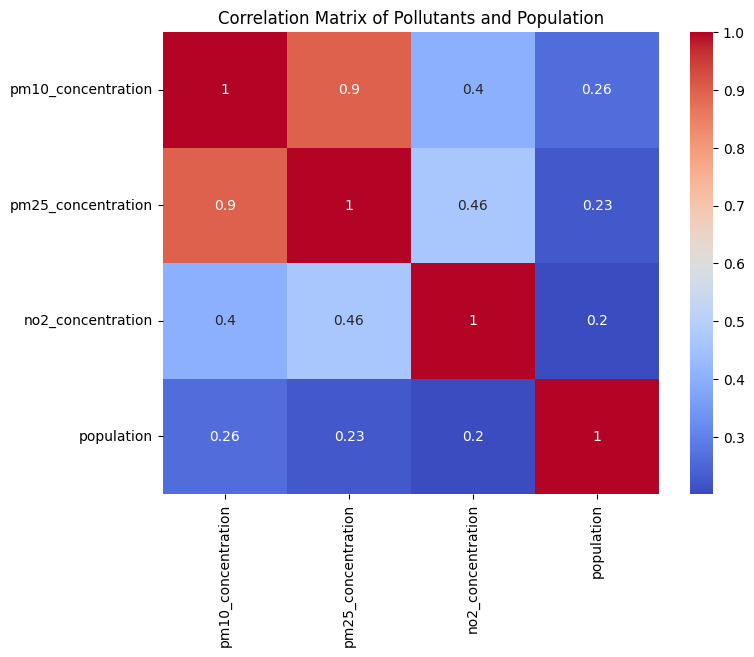

In [16]:
# Calculate the correlation matrix
correlation_matrix = data[['pm10_concentration', 'pm25_concentration', 'no2_concentration', 'population']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants and Population')
plt.show()

In [12]:
# Geographical Visualization

import folium
from folium.plugins import MarkerCluster

# Create a map centered around the median latitude and longitude
map_center = [data['latitude'].median(), data['longitude'].median()]
mymap = folium.Map(location=map_center, zoom_start=2)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(mymap)

# Add points to the map
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"City: {row['city']}<br>PM2.5: {row['pm25_concentration']} µg/m³<br>PM10: {row['pm10_concentration']} µg/m³",
        icon=folium.Icon(color='red' if row['pm25_concentration'] > 25 else 'green')
    ).add_to(marker_cluster)

# Display the map
mymap.save('air_quality_map.html')

KeyboardInterrupt: 

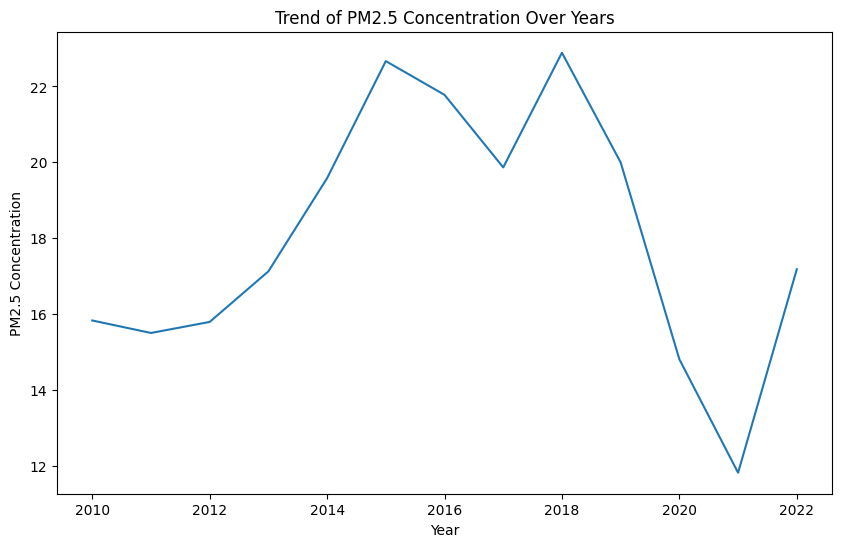

In [17]:
# Line plot to visualize temporal trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='pm25_concentration', data=data, ci=None)
plt.title('Trend of PM2.5 Concentration Over Years')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration')
plt.show()

In [18]:
# prompt: write code for finding total null values for each column in the dataset data

data.isnull().sum()


,0
who_region,0
iso3,0
country_name,0
city,0
year,3
version,0
pm10_concentration,11425
pm25_concentration,18364
no2_concentration,13160
pm10_tempcov,17689


In [19]:
# prompt: get the values for country name, pm25_concentration, pm10_concentration and no2_concentration values for which year value is null

# Filter the DataFrame for rows where 'year' is null
null_year_data = data[data['year'].isnull()]

# Select the desired columns
result = null_year_data[['country_name', 'pm25_concentration', 'pm10_concentration', 'no2_concentration']]

# Display the result
print(result)


      country_name  pm25_concentration  pm10_concentration  no2_concentration
2767         India                 NaN                 NaN                NaN
8507         India                44.0                 NaN                NaN
27889        India                 NaN                 NaN                NaN


In [20]:
# prompt: remove the rows where the year value is null

# Remove rows where 'year' is null
data = data.dropna(subset=['year'])
print(data.shape)

(40088, 20)


In [21]:
missing_values_by_country = data.groupby('country_name').apply(lambda x: x.isnull().sum())
missing_values_by_country[['pm10_concentration', 'pm25_concentration', 'no2_concentration']]

,pm10_concentration,pm25_concentration,no2_concentration
country_name,,,
Afghanistan,1,0,1
Albania,12,12,2
Algeria,1,0,1
Andorra,0,9,0
Argentina,1,10,2
Australia,16,66,148
Austria,225,880,77
Bahamas,0,0,3
Bahrain,2,5,14


In [22]:
# prompt: find country-wise missing values count for each columns pm10_concentration, pm25_concentration, no2_concentration, pm10_tempcov, pm25_tempcov, no2_tempcov and order by highest to lowest

# Group by country and count missing values for specific columns
missing_values_by_country = data.groupby('country_name')[['pm10_concentration', 'pm25_concentration', 'no2_concentration', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']].apply(lambda x: x.isnull().sum()).sort_values(by=['pm10_concentration', 'pm25_concentration', 'no2_concentration', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov'], ascending=False)

# Display the result
print(missing_values_by_country)


                                                    pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov
country_name                                                                                                                                          
China                                                             3394                   1               3468          3880           411         3880
United States of America                                          1975                 532               2437          3888          3888         3888
Canada                                                            1013                  77                372          1019            77          369
Germany                                                            559                1778                155           586          1791          155
Spain                                                              552                1819    

## Filling Missing Values
Missing values for pm25_concentration, pm10_concentration and no2_concentration\
To fill the missing values for a city for a particular year, we take the average of other locations values of the same country for the same year.

In [23]:
# Creating a temporary dataset for a country that has NULL values and find the mean so that this can verified later when the missing data is filled

spain_missing_data = data[(data['country_name']== 'Spain') & (data['year']==2010)][['city', 'pm25_concentration']]
print(spain_missing_data.head())

mean_spain = spain_missing_data['pm25_concentration'].mean()
print(mean_spain)
# City Aia/ESP has a value NaN which should bwe replaced with the mean value of 9.86

                      city  pm25_concentration
70   Abanto Y Ciervana/ESP                 NaN
331            Aguimes/ESP               7.378
381                Aia/ESP                 NaN
571             Alagon/ESP                 NaN
644           Albacete/ESP              14.159
9.865716417910447


In [24]:
# List of columns to fill missing values
columns_to_fill = ['pm10_concentration', 'pm25_concentration', 'no2_concentration']

# Define a function to fill missing values for each column
def fill_missing_values(group):
    for column in columns_to_fill:
        # Fill missing values with the mean of the column for the group
        group[column] = group[column].fillna(group[column].mean())
    return group

# Apply the function group-wise by country and year
df_filled = data.groupby(['country_name', 'year']).apply(fill_missing_values)

# Display the first few rows of the filled DataFrame
print(df_filled.head())

                          who_region iso3 country_name         city    year       version  pm10_concentration  pm25_concentration  no2_concentration  pm10_tempcov  pm25_tempcov  no2_tempcov type_of_stations                                          reference                                           web_link  population       population_source  latitude  longitude  who_ms
country_name year                                                                                                                                                                                                                                                                                                                                                                    
Afghanistan  2019.0 16488      5_Emr  AFG  Afghanistan    Kabul/AFG  2019.0   V5.0 (2022)                 NaN           119.77400                NaN           NaN          18.0          NaN              NaN  U.S. Department of State, United States Envi

In [25]:
# Verify the value of one of the field as created earlier

df_filled[(df_filled['city']== 'Aia/ESP') & (df_filled['year']==2010)][['city', 'pm25_concentration']]

,,,city,pm25_concentration
country_name,year,,,
Spain,2010.0,381,Aia/ESP,9.865716


In [26]:
df_filled.reset_index(drop=True, inplace=True)

In [27]:
# Verify all missing values are addressed
missing_values_by_country = df_filled.groupby('country_name').apply(lambda x: x.isnull().sum())
missing_values_by_country[['pm10_concentration', 'pm25_concentration', 'no2_concentration']]

,pm10_concentration,pm25_concentration,no2_concentration
country_name,,,
Afghanistan,1,0,1
Albania,0,0,0
Algeria,1,0,1
Andorra,0,9,0
Argentina,1,4,2
Australia,0,0,14
Austria,0,0,0
Bahamas,0,0,3
Bahrain,2,3,13


In [28]:
#df_filled[df_filled['country_name']=='China'][['year', 'city', 'no2_concentration']]
df_filled[df_filled['country_name']=='Australia'].groupby(['year'])['no2_concentration'].mean()

,no2_concentration
year,
2010.0,NaN
2011.0,NaN
2012.0,3.502500
2013.0,12.398500
2014.0,11.432111
2015.0,10.361400
2016.0,9.944077
2017.0,7.901667
2018.0,6.936333


We still have missing values due to missing values for all cities of the country for the particular year.\
It might not be a good idea to fill these and better to remove them from our analysis.

In [29]:
# prompt: create a new dataframe which has the rows of the missing values for pm25, pm10 and no2 removed
df_cleaned = df_filled.dropna(subset=['pm25_concentration', 'pm10_concentration', 'no2_concentration'])
print(df_cleaned.shape)


(35815, 20)


In [30]:
df_cleaned.isnull().sum()

,0
who_region,0
iso3,0
country_name,0
city,0
year,0
version,0
pm10_concentration,0
pm25_concentration,0
no2_concentration,0
pm10_tempcov,14098


##**Visualization after cleaning the data (outliers and missing data)**


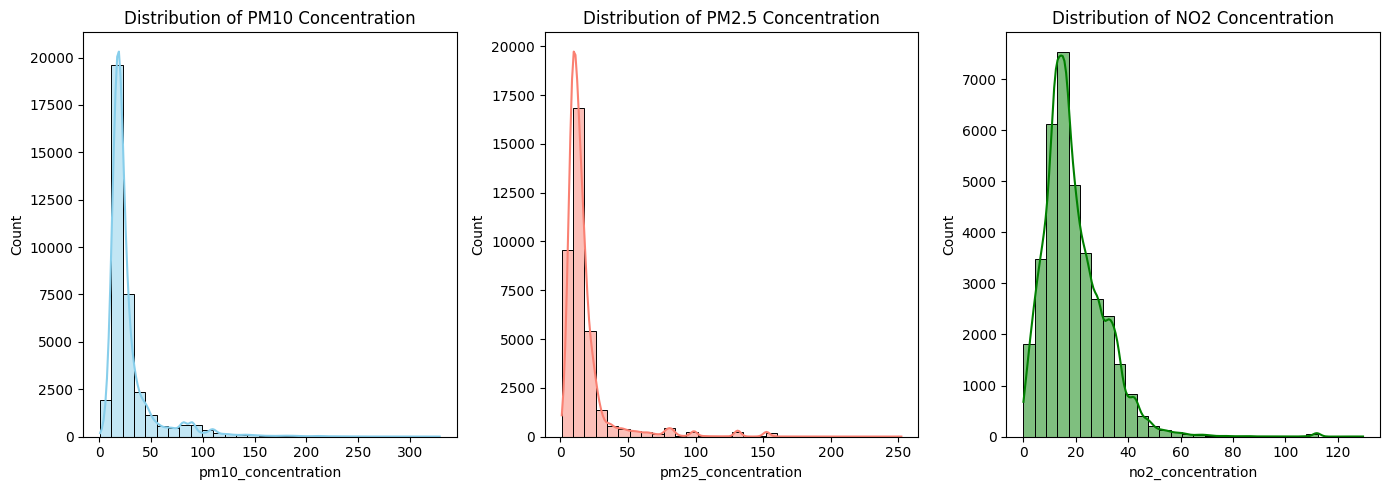

In [24]:
#Distribution Plots for Air Pollutant Levels

# Plot distributions for each pollutant concentration
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['pm10_concentration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of PM10 Concentration')

plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['pm25_concentration'], bins=30, kde=True, color='salmon')
plt.title('Distribution of PM2.5 Concentration')

plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['no2_concentration'], bins=30, kde=True, color='green')
plt.title('Distribution of NO2 Concentration')

plt.tight_layout()
plt.show()

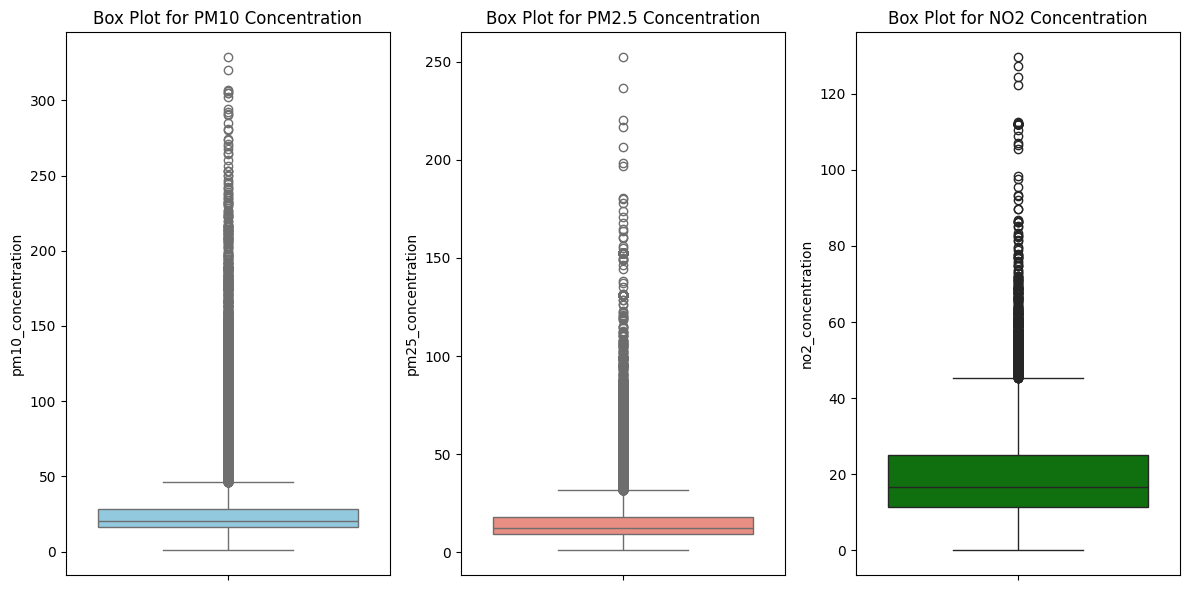

In [25]:
# Plot box plots for each pollutant concentration
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_cleaned['pm10_concentration'], color='skyblue')
plt.title('Box Plot for PM10 Concentration')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_cleaned['pm25_concentration'], color='salmon')
plt.title('Box Plot for PM2.5 Concentration')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_cleaned['no2_concentration'], color='green')
plt.title('Box Plot for NO2 Concentration')

plt.tight_layout()
plt.show()

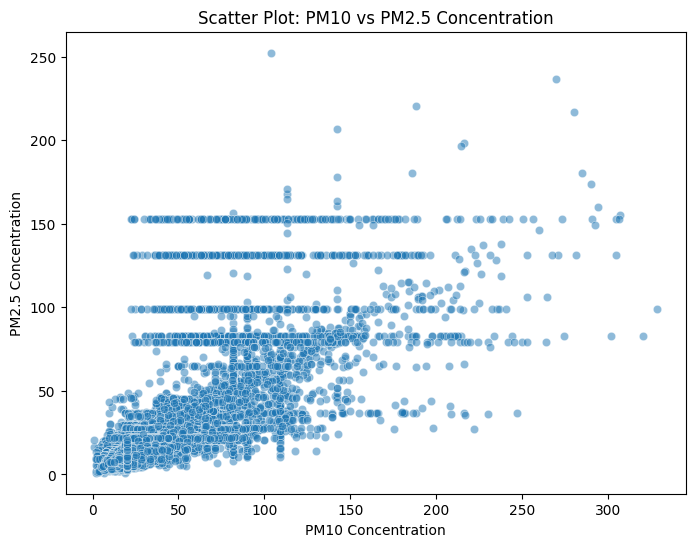

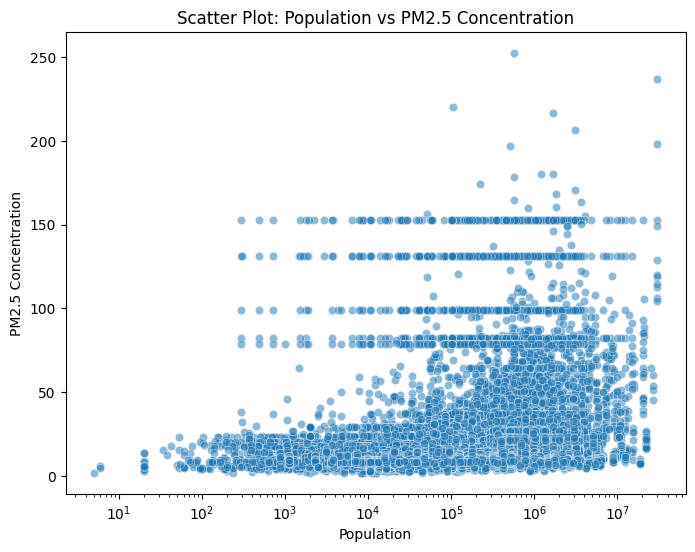

In [26]:
# Scatter plot between PM2.5 and PM10 concentrations
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['pm10_concentration'], y=df_cleaned['pm25_concentration'], alpha=0.5)
plt.title('Scatter Plot: PM10 vs PM2.5 Concentration')
plt.xlabel('PM10 Concentration')
plt.ylabel('PM2.5 Concentration')
plt.show()

# Scatter plot between population and PM2.5 concentrations
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['population'], y=df_['pm25_concentration'], alpha=0.5)
plt.title('Scatter Plot: Population vs PM2.5 Concentration')
plt.xlabel('Population')
plt.ylabel('PM2.5 Concentration')
plt.xscale('log')  # Log scale to handle wide range of population values
plt.show()

**What is the distribution of air quality measurements (PM10, PM2.5, NO2) across different WHO regions?**

In [31]:
# prompt: get the descriptive analysis of temporal variables

temp_columns = ['pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']
df_cleaned[temp_columns].describe()


,pm10_tempcov,pm25_tempcov,no2_tempcov
count,21717.000000,13878.000000,23091.000000
mean,89.310034,83.092376,88.286172
std,19.358169,28.264088,22.846952
min,0.000000,0.000000,0.000000
25%,91.000000,85.000000,92.000000
50%,96.000000,96.000000,96.000000
75%,99.000000,99.000000,98.000000
max,100.000000,100.000000,100.000000


**Analysis of temporal coverage variables**
* High Mean Temporal Coverage: The mean temporal coverage is high for all three pollutants (around 88-89% for PM10 and NO2, and 84% for PM2.5). This indicates that most locations have good temporal coverage for monitoring air quality.
* Minimum of 0%: There are some locations with 0% coverage, which suggests that data is missing or incomplete for those locations or time periods.
* Consistent Upper Range: The 75th percentile for all pollutants is close to 100%, meaning that a significant portion of the data has near-complete yearly coverage.
* Standard Deviation: The higher standard deviation for PM2.5 (26.8) indicates more variability in the temporal coverage compared to PM10 (20.3) and NO2 (23.1).

**Inference**
* Data Quality: Most data is good quality but presence of 0% values suggest missing data
* Focus on Variability: We will investigate cities or locations with low temporal coverage and understand whether they should be excluded or interpolated to improve analysis reliability.

In [32]:
# prompt: find the total number of rows with values zero or nulls for temporal variables

# Count rows with zero or null values for temporal variables
temp_columns = ['pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']
rows_with_zero_or_null = df_cleaned[(df_cleaned[temp_columns] == 0).any(axis=1) | df_cleaned[temp_columns].isnull().any(axis=1)]
total_rows_with_zero_or_null = len(rows_with_zero_or_null)

print(f"Total number of rows with zero or null values for temporal variables: {total_rows_with_zero_or_null}")


Total number of rows with zero or null values for temporal variables: 26230


**Addressing zero and null values**
* We will fill all the zero values with null
* Fill the zero values with the country mean for the temporal variables
* Remove all the rows that have coverage less than 70

In [33]:
#since there are null values and zeroes in temporal fields, we will replace zeroes with nulls

df_cleaned['pm25_tempcov'] = df_cleaned['pm25_tempcov'].replace(0, np.nan)
df_cleaned['pm10_tempcov'] = df_cleaned['pm10_tempcov'].replace(0, np.nan)
df_cleaned['no2_tempcov'] = df_cleaned['no2_tempcov'].replace(0, np.nan)
print(df_cleaned.shape)


(35815, 20)


In [34]:
# Group by country and calculate the mean for each temporal coverage column
df_cleaned['pm10_tempcov'] = df_cleaned.groupby('country_name')['pm10_tempcov'].transform(lambda x: x.fillna(x.mean()))
df_cleaned['pm25_tempcov'] = df_cleaned.groupby('country_name')['pm25_tempcov'].transform(lambda x: x.fillna(x.mean()))
df_cleaned['no2_tempcov'] = df_cleaned.groupby('country_name')['no2_tempcov'].transform(lambda x: x.fillna(x.mean()))

# Check the result
print(df_cleaned.shape)


(35815, 20)


In [36]:
df_cleaned[(df_cleaned['no2_tempcov'].isna()) | (df_cleaned['pm10_tempcov'].isna()) | (df_cleaned['pm25_tempcov'].isna())].shape

(5246, 20)

In [37]:
df_cleaned = df_cleaned.dropna(subset = ['pm10_tempcov', 'pm25_tempcov', 'no2_tempcov'])
print(df_cleaned.shape)
print(df_cleaned.info())

(30569, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 30569 entries, 1 to 40087
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          30569 non-null  object 
 1   iso3                30569 non-null  object 
 2   country_name        30569 non-null  object 
 3   city                30569 non-null  object 
 4   year                30569 non-null  float64
 5   version             30569 non-null  object 
 6   pm10_concentration  30569 non-null  float64
 7   pm25_concentration  30569 non-null  float64
 8   no2_concentration   30569 non-null  float64
 9   pm10_tempcov        30569 non-null  float64
 10  pm25_tempcov        30569 non-null  float64
 11  no2_tempcov         30569 non-null  float64
 12  type_of_stations    22764 non-null  object 
 13  reference           1801 non-null   object 
 14  web_link            1414 non-null   object 
 15  population          14905 non-null  float64
 1

In [39]:
# Remove the data which has coverage less than 75%
df_filtered = df_cleaned[(df_cleaned['pm25_tempcov'] > 75) | (df_cleaned['pm10_tempcov'] > 75) | (df_cleaned['no2_tempcov'] > 75)]
df_filtered.shape

(29167, 20)

In [40]:
df_filtered[df_filtered['pm25_tempcov']<75].shape

(4088, 20)

In [105]:
temp_columns = ['pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']
df_cleaned[temp_columns].describe()

,pm10_tempcov,pm25_tempcov,no2_tempcov
count,20309.000000,12379.000000,21479.000000
mean,93.129220,90.887836,93.066819
std,11.489952,16.111114,13.307170
min,1.000000,1.000000,0.913043
25%,93.000000,91.000000,93.000000
50%,97.000000,97.000000,96.000000
75%,99.000000,99.000000,99.000000
max,100.000000,100.000000,100.000000


In [107]:
df_cleaned[df_cleaned['pm25_tempcov']<75].shape

(1108, 20)

**Analyzing impact of low coverage on pollutant trends**

In [41]:
#Categorize cities into bins based on temporal coverage (e.g., low, medium, high) to assess trends

def categorize_coverage(coverage):
  """Categorizes temporal coverage into low, medium, and high."""
  if coverage < 50:
    return 'Low'
  elif coverage < 75:
    return 'Medium'
  else:
    return 'High'

for col in ['pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']:
  df_cleaned[f'{col}_bin'] = df_cleaned[col].apply(categorize_coverage)

df_cleaned.shape

(30569, 23)

(35817, 23)

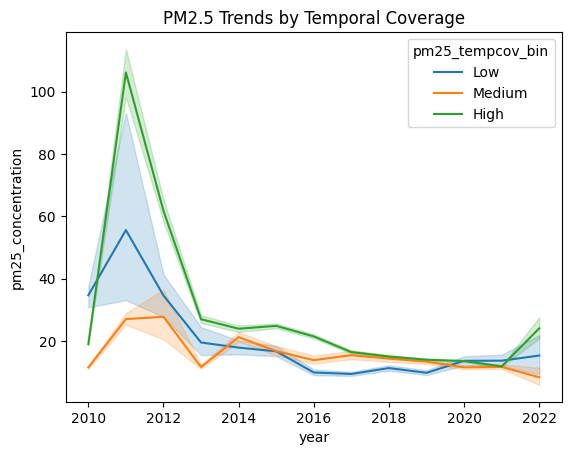

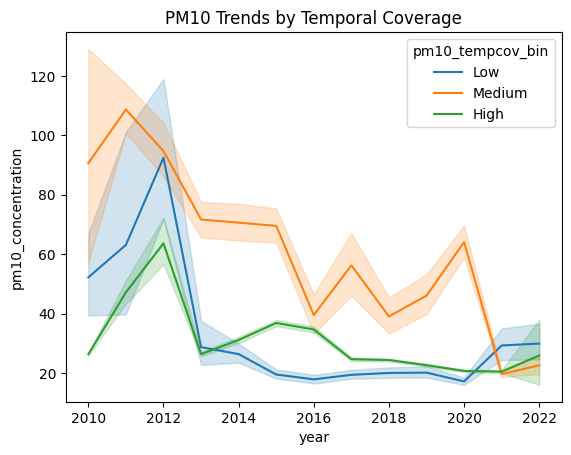

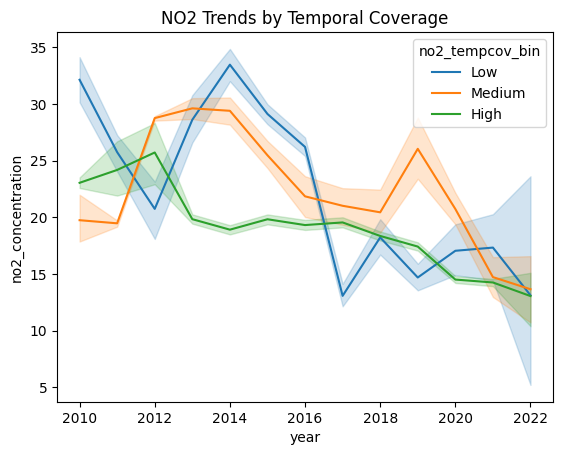

In [42]:
#Use line plots to compare trends in pollutant levels for cities with low, medium, and high temporal coverage.

sns.lineplot(x='year', y='pm25_concentration', hue='pm25_tempcov_bin', data=df_cleaned)
plt.title('PM2.5 Trends by Temporal Coverage')
plt.show()
sns.lineplot(x='year', y='pm10_concentration', hue='pm10_tempcov_bin', data=df_cleaned)
plt.title('PM10 Trends by Temporal Coverage')
plt.show()
sns.lineplot(x='year', y='no2_concentration', hue='no2_tempcov_bin', data=df_cleaned)
plt.title('NO2 Trends by Temporal Coverage')
plt.show()

**Impact of coverage on pollutants**\
For PM2.5 and PM10:
* Low Coverage: The cities with low temporal coverage (blue) show a lot of variability and sharp peaks, particularly around 2011-2013, which could indicate unreliable or incomplete data.
* Medium Coverage: Cities with medium temporal coverage (orange) also show more variability than those with high coverage, but the trend stabilizes after 2014.
* High Coverage: Cities with high coverage (green) display a more consistent and smoother trend across the years, suggesting that they provide more reliable data.\
\
For NO2:\
* Low Coverage (blue): Cities with low temporal coverage show high variability and a wide confidence band, especially before 2014, indicating inconsistency in data collection.
* Medium Coverage (orange): Medium coverage also shows volatility, with large fluctuations, particularly between 2012-2017.
* High Coverage (green): High coverage shows the smoothest trend with lower variability, providing more reliable data for analysis.\
\

**Inference**\

PM2.5 and PM10:
* Data Reliability: Higher coverage results in more reliable and consistent trends, while low and medium coverage are prone to fluctuations, likely due to incomplete data.
* Potential Bias: The sharp peaks in low-coverage cities (especially around 2011-2013) may distort overall analysis if not handled carefully. This implies you might need to exclude or carefully handle data from low-coverage cities in your analysis.\
\
NO2:
* Higher temporal coverage leads to more stable and reliable trends, while low and medium coverage show significant fluctuations, likely due to data gaps.

**Remove low coverage data to improve the data quality which helps in analysis**

In [43]:
# Filter the data that has low coverage
df_filtered = df_cleaned[(df_cleaned['pm25_tempcov_bin'] != 'Low') & (df_cleaned['pm10_tempcov_bin'] != 'Low') & (df_cleaned['no2_tempcov_bin'] != 'Low')]
print(df_filtered.shape)

(25821, 23)


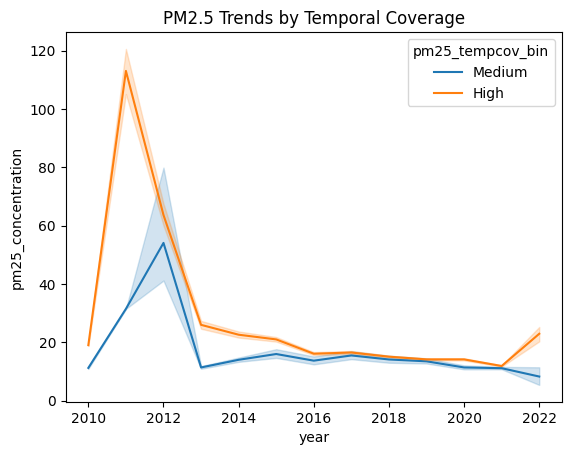

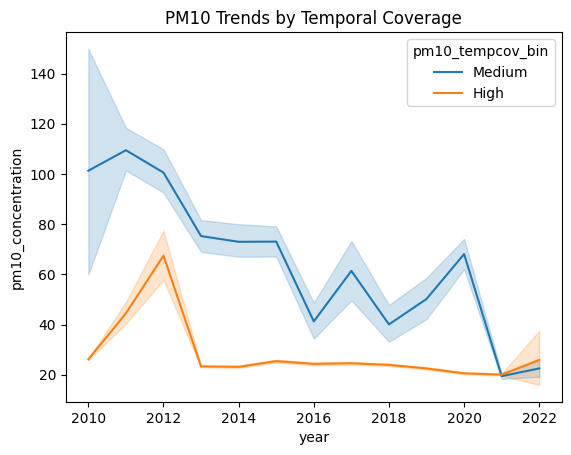

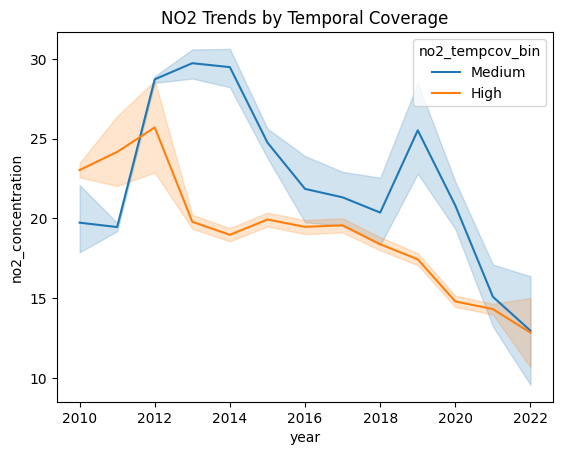

In [44]:
sns.lineplot(x='year', y='pm25_concentration', hue='pm25_tempcov_bin', data=df_filtered)
plt.title('PM2.5 Trends by Temporal Coverage')
plt.show()
sns.lineplot(x='year', y='pm10_concentration', hue='pm10_tempcov_bin', data=df_filtered)
plt.title('PM10 Trends by Temporal Coverage')
plt.show()
sns.lineplot(x='year', y='no2_concentration', hue='no2_tempcov_bin', data=df_filtered)
plt.title('NO2 Trends by Temporal Coverage')
plt.show()

**Descriptive Analysis Questions**
* What is the average level of PM10, PM2.5, and NO2 across different cities and countries?
* Which cities or countries have the highest and lowest average concentrations of PM10, PM2.5, and NO2?
* What is the distribution of air quality measurements (PM10, PM2.5, NO2) across different WHO regions?
* What is the proportion of cities or regions exceeding the WHO recommended air quality limits for PM10, PM2.5, and NO2?
* What is the range of temporal coverage (tempcov columns) for air quality measurements? Are there any patterns in temporal coverage across different regions or cities?

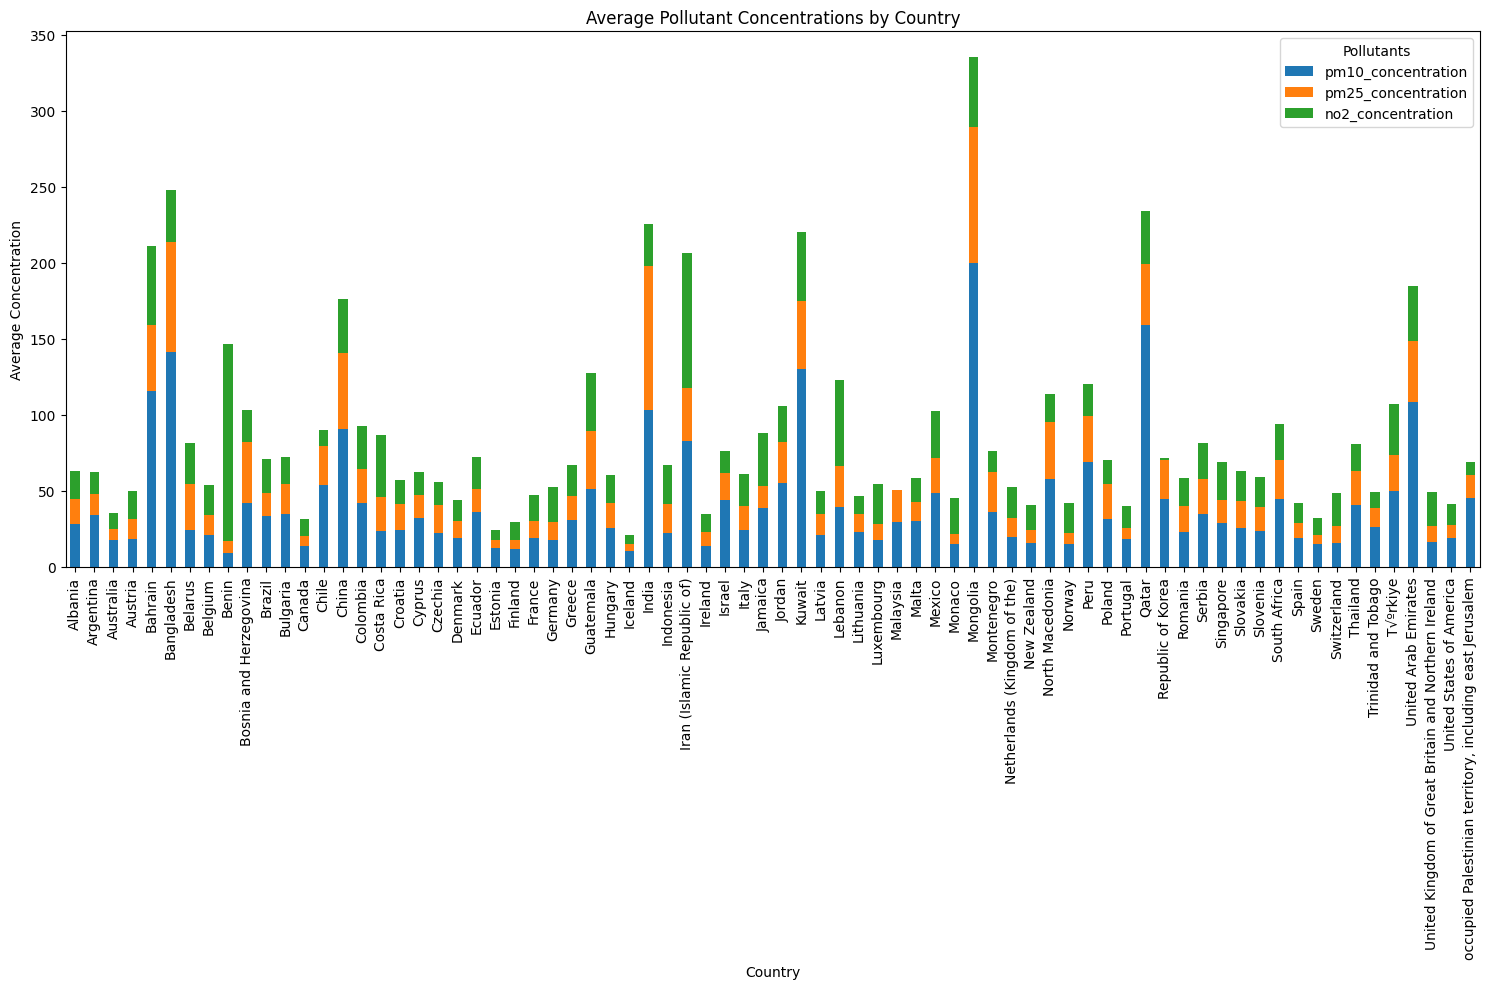

In [37]:
# prompt: make the plot width bigger

# Create a stacked chart to answer the first question

# Group the data by country and calculate the mean of the pollutants
avg_pollutants = df_cleaned.groupby('country_name')[['pm10_concentration', 'pm25_concentration', 'no2_concentration']].mean()

# Create a stacked bar chart
#plt.figure(figsize=(15, 10))  # Increase the width of the plot
avg_pollutants.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Average Pollutant Concentrations by Country')
plt.xlabel('Country')
plt.ylabel('Average Concentration')
plt.xticks(rotation=90)
plt.legend(title='Pollutants')
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# prompt: Which cities or countries have the highest and lowest average concentrations of PM10, PM2.5, and NO2?

# Find the countries with the highest and lowest average PM10 concentration
highest_pm10_country = avg_pollutants['pm10_concentration'].idxmax()
lowest_pm10_country = avg_pollutants['pm10_concentration'].idxmin()

# Find the countries with the highest and lowest average PM2.5 concentration
highest_pm25_country = avg_pollutants['pm25_concentration'].idxmax()
lowest_pm25_country = avg_pollutants['pm25_concentration'].idxmin()

# Find the countries with the highest and lowest average NO2 concentration
highest_no2_country = avg_pollutants['no2_concentration'].idxmax()
lowest_no2_country = avg_pollutants['no2_concentration'].idxmin()

# Print the results
print(f"Country with highest average PM10 concentration: {highest_pm10_country}")
print(f"Country with lowest average PM10 concentration: {lowest_pm10_country}")
print(f"Country with highest average PM2.5 concentration: {highest_pm25_country}")
print(f"Country with lowest average PM2.5 concentration: {lowest_pm25_country}")
print(f"Country with highest average NO2 concentration: {highest_no2_country}")
print(f"Country with lowest average NO2 concentration: {lowest_no2_country}")


Country with highest average PM10 concentration: Mongolia
Country with lowest average PM10 concentration: Benin
Country with highest average PM2.5 concentration: India
Country with lowest average PM2.5 concentration: Iceland
Country with highest average NO2 concentration: Benin
Country with lowest average NO2 concentration: Malaysia


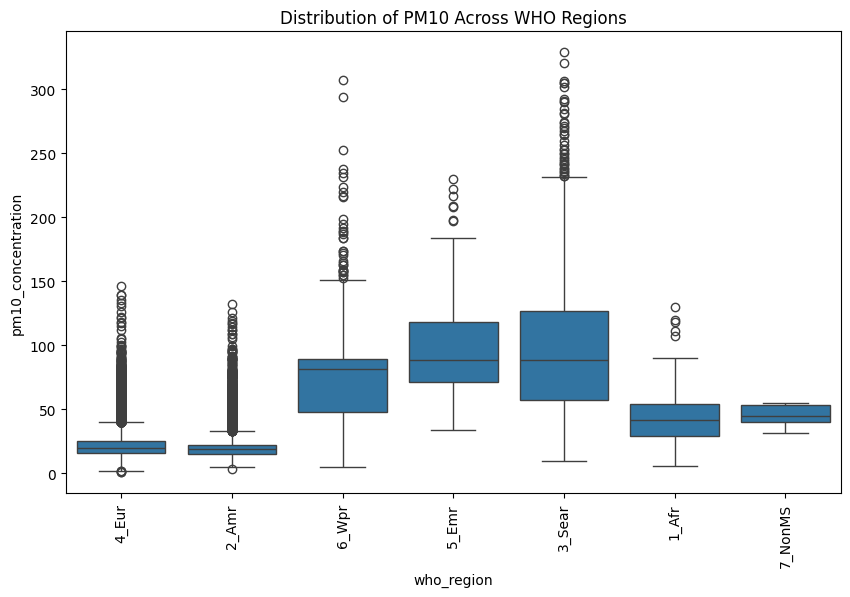

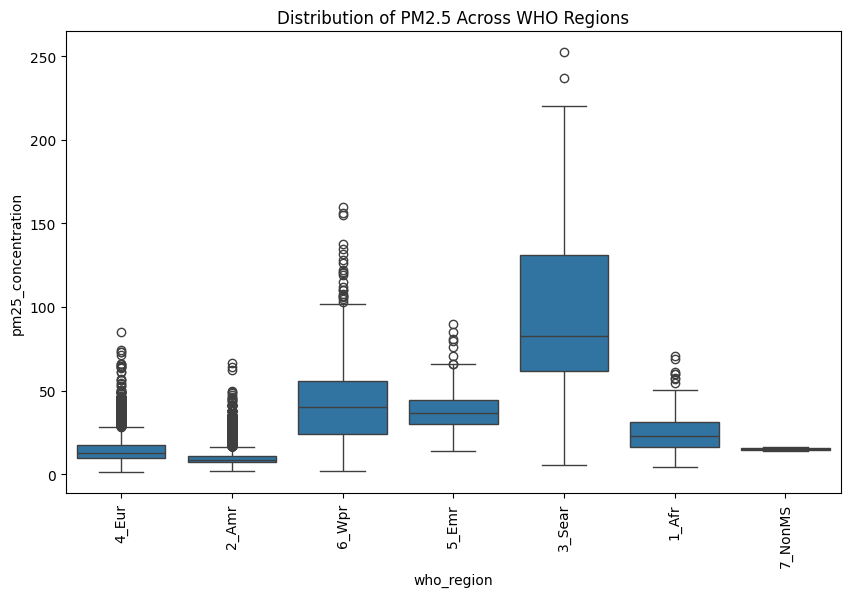

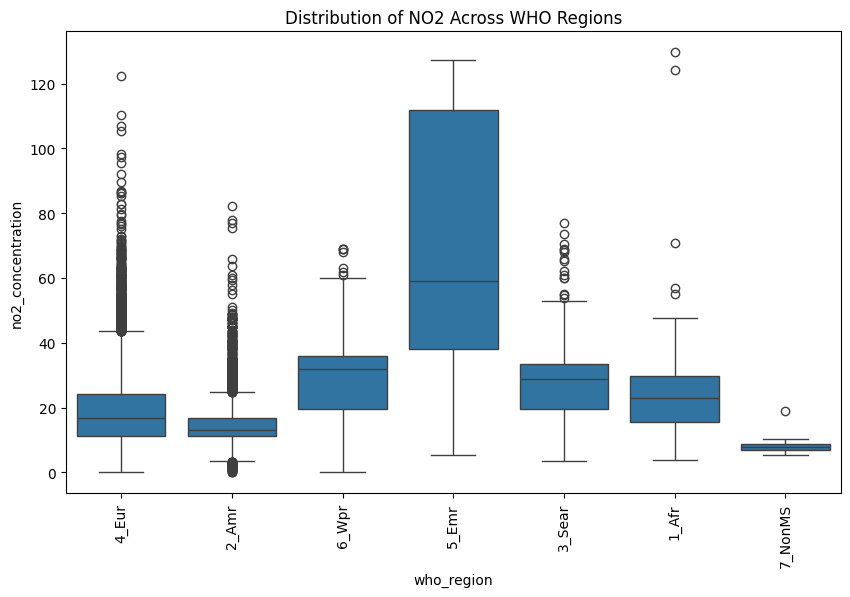

In [ ]:
# Boxplot for PM10 across WHO regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='who_region', y='pm10_concentration', data=df_cleaned)
plt.title('Distribution of PM10 Across WHO Regions')
plt.xticks(rotation=90)
plt.show()

# Boxplot for PM2.5 across WHO regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='who_region', y='pm25_concentration', data=df_cleaned)
plt.title('Distribution of PM2.5 Across WHO Regions')
plt.xticks(rotation=90)
plt.show()

# Boxplot for NO2 across WHO regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='who_region', y='no2_concentration', data=df_cleaned)
plt.title('Distribution of NO2 Across WHO Regions')
plt.xticks(rotation=90)
plt.show()

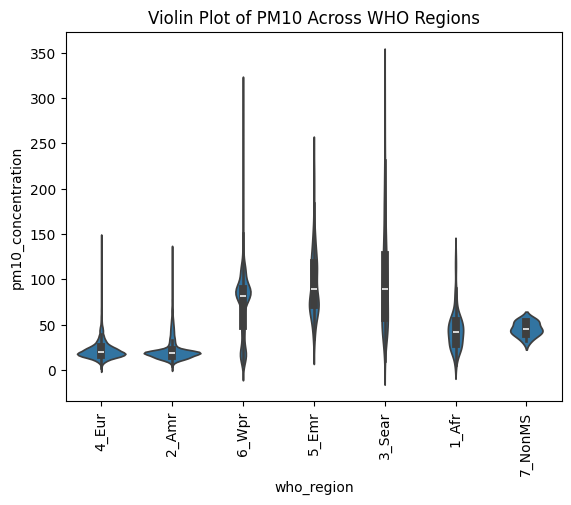

In [ ]:
sns.violinplot(x='who_region', y='pm10_concentration', data=df_cleaned)
plt.title('Violin Plot of PM10 Across WHO Regions')
plt.xticks(rotation=90)
plt.show()

**What is the proportion of cities or regions exceeding the WHO recommended air quality limits for PM10, PM2.5, and NO2?**

In [ ]:
# Define WHO limits (use annual mean values for this example)
pm25_limit = 5
pm10_limit = 15
no2_limit = 10

# Calculate whether cities exceed limits (True if exceeded, False if not)
df_cleaned['pm25_exceed'] = df_cleaned['pm25_concentration'] > pm25_limit
df_cleaned['pm10_exceed'] = df_cleaned['pm10_concentration'] > pm10_limit
df_cleaned['no2_exceed'] = df_cleaned['no2_concentration'] > no2_limit

# Calculate proportion of cities exceeding limits
pm25_exceedance_rate = df_cleaned['pm25_exceed'].mean() * 100  # in percentage
no2_exceedance_rate = df_cleaned['no2_exceed'].mean() * 100    # in percentage
pm10_exceedance_rate = df_cleaned['pm10_exceed'].mean() * 100  # in percentage

# Display the results
print(f"Proportion of cities exceeding PM2.5 limit: {pm25_exceedance_rate:.2f}%")
print(f"Proportion of cities exceeding PM10 limit: {pm10_exceedance_rate:.2f}%")
print(f"Proportion of cities exceeding NO2 limit: {no2_exceedance_rate:.2f}%")

Proportion of cities exceeding PM2.5 limit: 97.12%
Proportion of cities exceeding PM10 limit: 82.43%
Proportion of cities exceeding NO2 limit: 81.18%


#“What is the percentage range of temporal coverage (tempcov) for air quality measurements across cities and regions? Are there any noticeable patterns of under- or over-coverage in specific regions or cities?”

In [46]:
df_cleaned['who_region'] = df_cleaned['who_region'].replace({
    '1_Afr': 'African',
    '2_Amr': 'Americas',
    '3_Sear': 'South_East_Asian',
    '4_Eur': 'Eurupean',
    '5_Emr': 'Eastern_Mediterranean',
    '6_Wpr': 'Western_Pacific',
    '7_NonMS': 'Non_member'
})


<Axes: xlabel='who_region'>

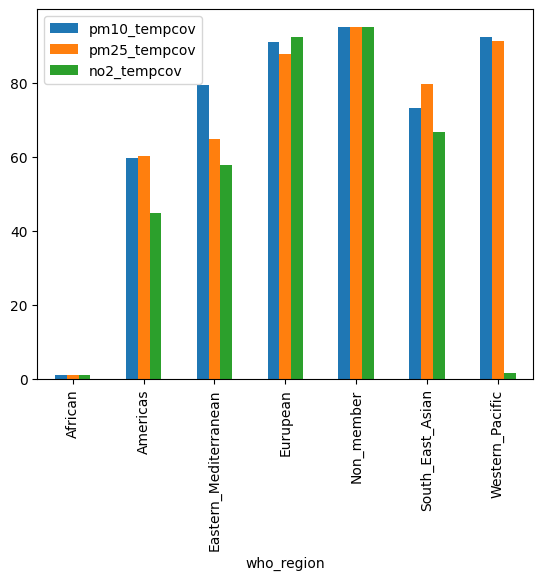

In [47]:
avg_tempcov_region = df_cleaned.groupby('who_region')[['pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']].mean()
avg_tempcov_region.plot(kind='bar')

#Comparative Analysis Questions:

* How do air quality levels (PM10, PM2.5, NO2) compare across different WHO regions (e.g., Europe vs. Southeast Asia)?
* Yearly trends in air pollution
* Is there a correlation between air pollutant levels (e.g., PM10 and PM2.5) in different regions or cities?
* Are there differences in pollutant levels based on different population densities?

***How do air quality levels (PM10, PM2.5, NO2) compare across different WHO regions (e.g., Europe vs. Southeast Asia)?***

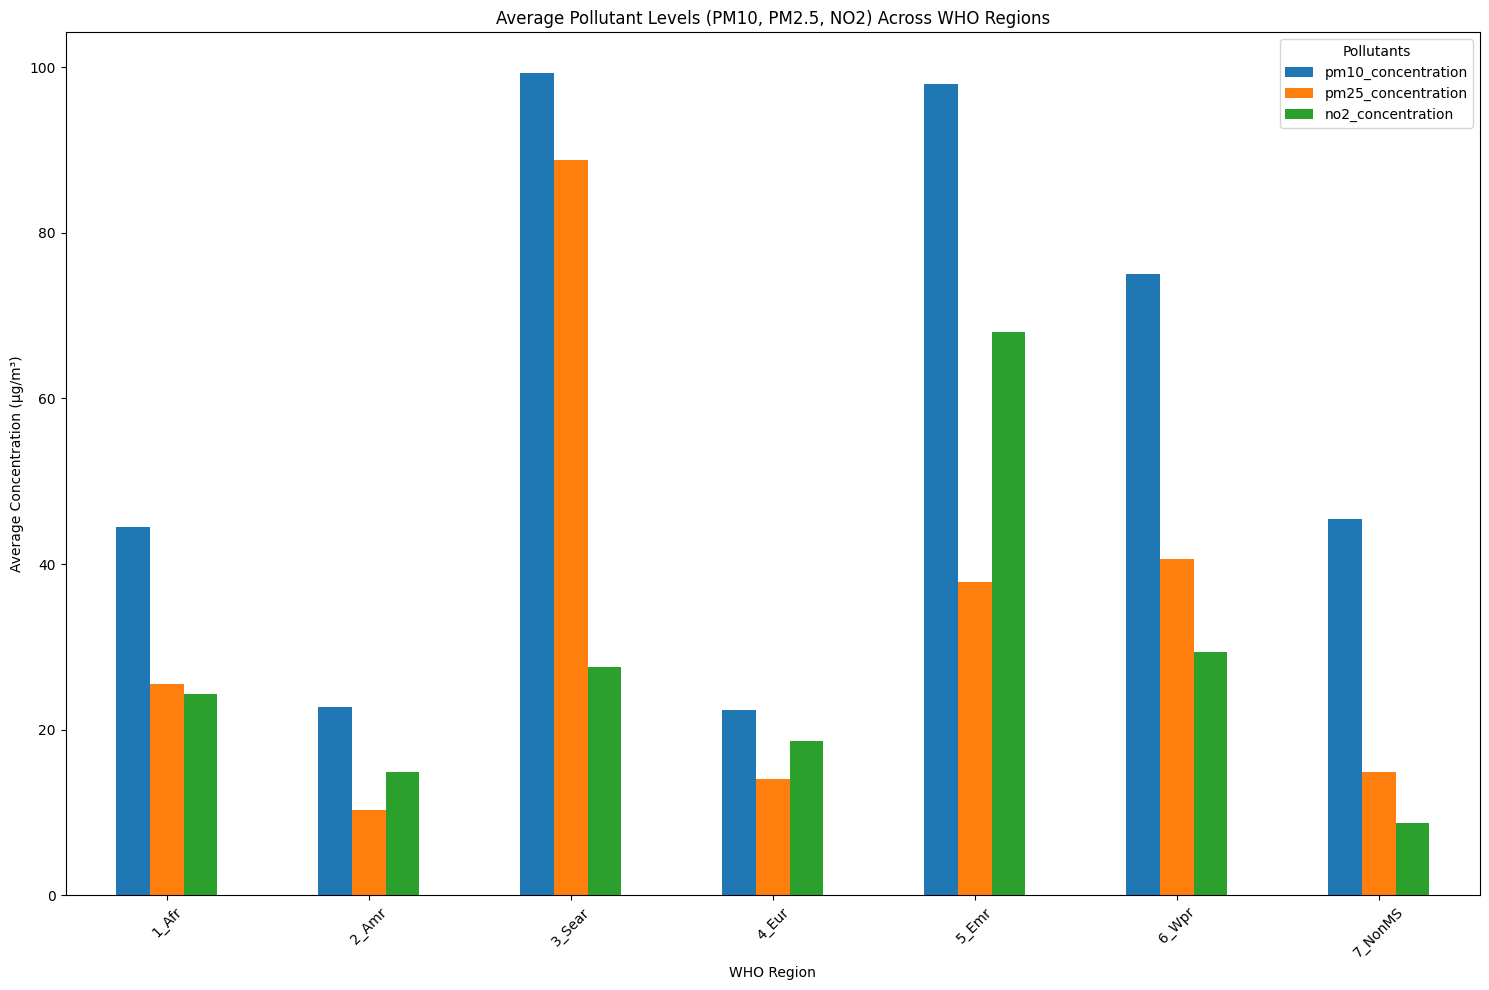

In [ ]:
# Calculate the average concentrations of PM10, PM2.5, and NO2 for each WHO region
avg_pollutants_by_region = df_cleaned.groupby('who_region')[['pm10_concentration', 'pm25_concentration', 'no2_concentration']].mean()

# Plot the comparison
avg_pollutants_by_region.plot(kind='bar', figsize=(15, 10))
plt.title('Average Pollutant Levels (PM10, PM2.5, NO2) Across WHO Regions')
plt.xlabel('WHO Region')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()

***Yearly trends in Air pollution***

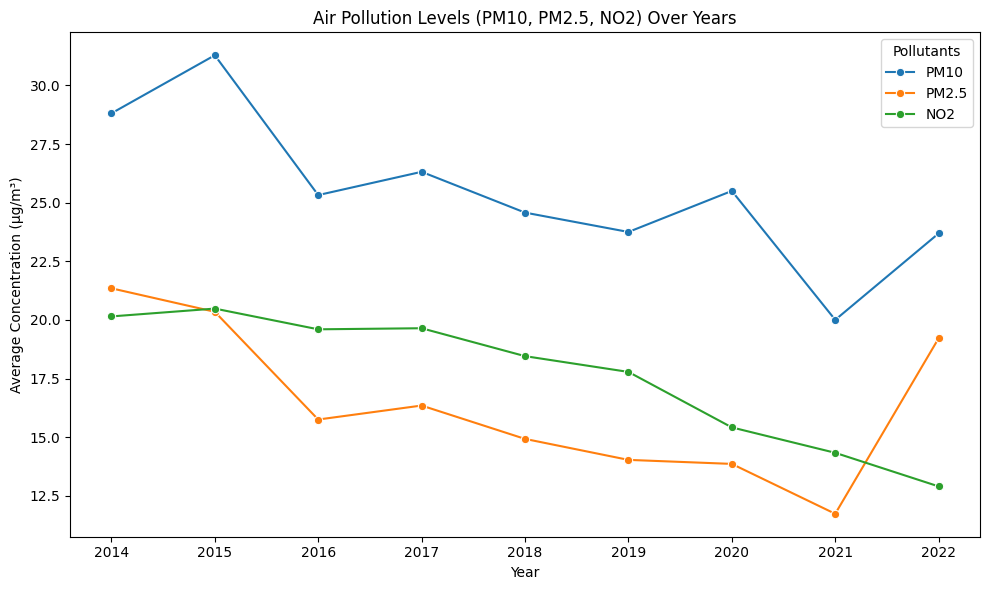

In [50]:
# Calculate yearly averages for each pollutant
avg_pollutants_by_year = df_filtered[df_filtered['year']>2013].groupby('year')[['pm10_concentration', 'pm25_concentration', 'no2_concentration']].mean()

# Plot the average concentrations over years for each pollutant
plt.figure(figsize=(10, 6))

# PM10
sns.lineplot(x=avg_pollutants_by_year.index, y=avg_pollutants_by_year['pm10_concentration'], label='PM10', marker='o')

# PM2.5
sns.lineplot(x=avg_pollutants_by_year.index, y=avg_pollutants_by_year['pm25_concentration'], label='PM2.5', marker='o')

# NO2
sns.lineplot(x=avg_pollutants_by_year.index, y=avg_pollutants_by_year['no2_concentration'], label='NO2', marker='o')

# Add titles and labels
plt.title('Air Pollution Levels (PM10, PM2.5, NO2) Over Years')
plt.xlabel('Year')
plt.ylabel('Average Concentration (µg/m³)')
plt.legend(title='Pollutants')
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
df_cleaned.groupby('city')['population'].max().describe()


,population
count,4.348000e+03
mean,4.244381e+05
std,1.517423e+06
min,5.000000e+00
25%,1.268275e+04
50%,5.308200e+04
75%,2.753888e+05
max,3.029094e+07


In [60]:
# prompt: show the population descriptive analysis without exponential notation

# Descriptive analysis of population by taking max population of each city
pd.options.display.float_format = '{:.2f}'.format
print(df_filtered.groupby('city')['population'].max().describe())
pd.options.display.float_format = None # reset to default


count       3390.00
mean      276834.06
std      1302401.56
min            6.00
25%        10174.25
50%        37518.50
75%       140799.00
max     30290936.00
Name: population, dtype: float64


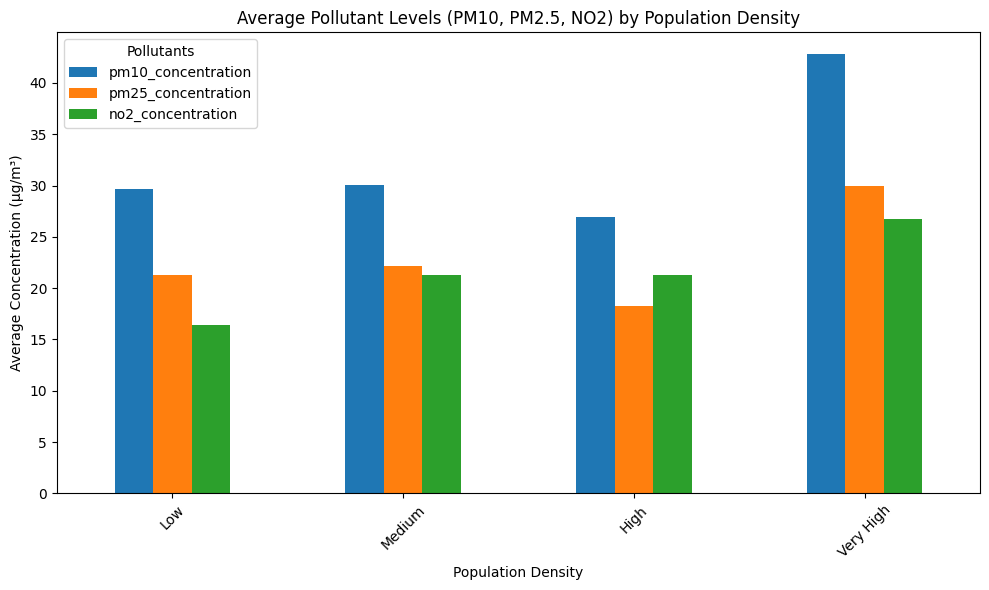

In [61]:
# Adjust bins based on descriptive statistics
df_filtered['density_bin'] = pd.cut(df_filtered['population'],
                                   bins=[0, 10000, 38000, 140000, 1e8],
                                   labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate the average pollutant levels for each population density bin
avg_pollutants_by_density = df_filtered.groupby('density_bin')[['pm10_concentration', 'pm25_concentration', 'no2_concentration']].mean()

# Plot the comparison
avg_pollutants_by_density.plot(kind='bar', figsize=(10, 6))
plt.title('Average Pollutant Levels (PM10, PM2.5, NO2) by Population Density')
plt.xlabel('Population Density')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.legend(title='Pollutants')
plt.tight_layout()

# Show the plot
plt.show()

#Trend Analysis Questions:

* What are the trends in air quality over time for specific cities or countries, if time-series data is available?
* Are there any emerging patterns or trends in air pollution levels across regions or globally over multiple years?
* How has air quality improved or deteriorated over time in different regions or cities?

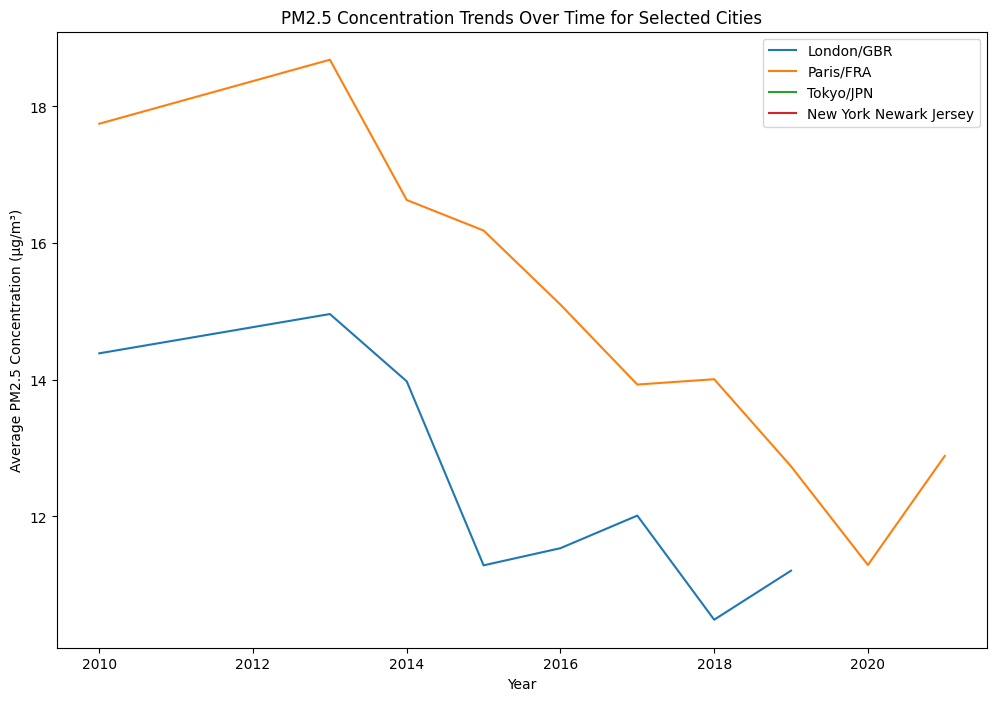

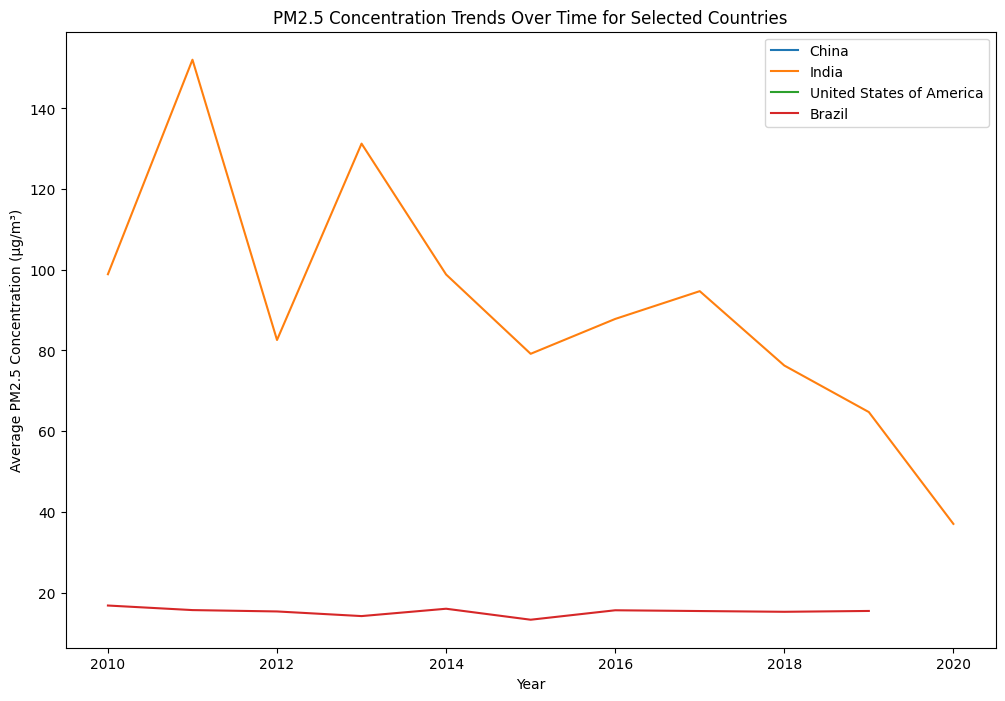

In [63]:
# prompt: What are the trends in air quality over time for specific cities or countries, if time-series data is available

# Group data by city and year, then calculate the average pollutant concentrations
city_year_avg = df_filtered.groupby(['city', 'year'])[['pm10_concentration', 'pm25_concentration', 'no2_concentration']].mean().reset_index()

# Select a few cities for trend analysis (replace with your desired cities)
selected_cities = ['London/GBR', 'Paris/FRA', 'Tokyo/JPN', 'New York Newark Jersey']

# Plot the trends for the selected cities
plt.figure(figsize=(12, 8))
for city in selected_cities:
  city_data = city_year_avg[city_year_avg['city'] == city]
  sns.lineplot(x='year', y='pm25_concentration', data=city_data, label=city)  # You can change 'pm25_concentration' to other pollutants

plt.title('PM2.5 Concentration Trends Over Time for Selected Cities')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.legend()
plt.show()


# You can also plot trends for specific countries by changing the groupby and selection criteria
# Example for a country:
country_year_avg = df_filtered.groupby(['country_name', 'year'])[['pm10_concentration', 'pm25_concentration', 'no2_concentration']].mean().reset_index()

selected_countries = ['China', 'India', 'United States of America', 'Brazil']

plt.figure(figsize=(12, 8))
for country in selected_countries:
  country_data = country_year_avg[country_year_avg['country_name'] == country]
  sns.lineplot(x='year', y='pm25_concentration', data=country_data, label=country)

plt.title('PM2.5 Concentration Trends Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.legend()
plt.show()


#What is the impact of the temporal coverage (tempcov columns) on the reliability and representativeness of the air quality data?
	•	Are there any discrepancies or outliers in the data that need to be addressed before analysis?
	•	How does the data coverage vary between regions, and does this affect the comparability of the results?

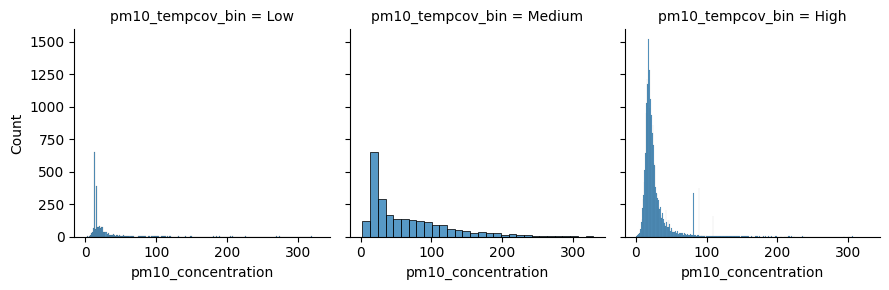

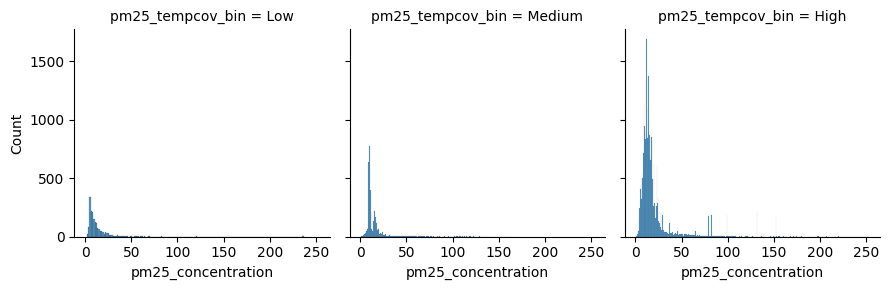

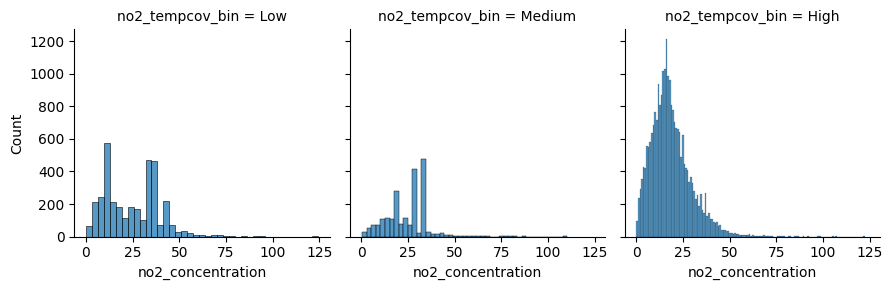

In [74]:
# Facet Grid histogram - separate histograms for each temporal coverage bin, helping visualize distribution differences

pm10 = sns.FacetGrid(df_cleaned, col='pm10_tempcov_bin')
pm10.map(sns.histplot, 'pm10_concentration')

pm25 = sns.FacetGrid(df_cleaned, col='pm25_tempcov_bin')
pm25.map(sns.histplot, 'pm25_concentration')

no2 = sns.FacetGrid(df_cleaned, col='no2_tempcov_bin')
no2.map(sns.histplot, 'no2_concentration')
plt.show()

#How does data coverage vary between regions

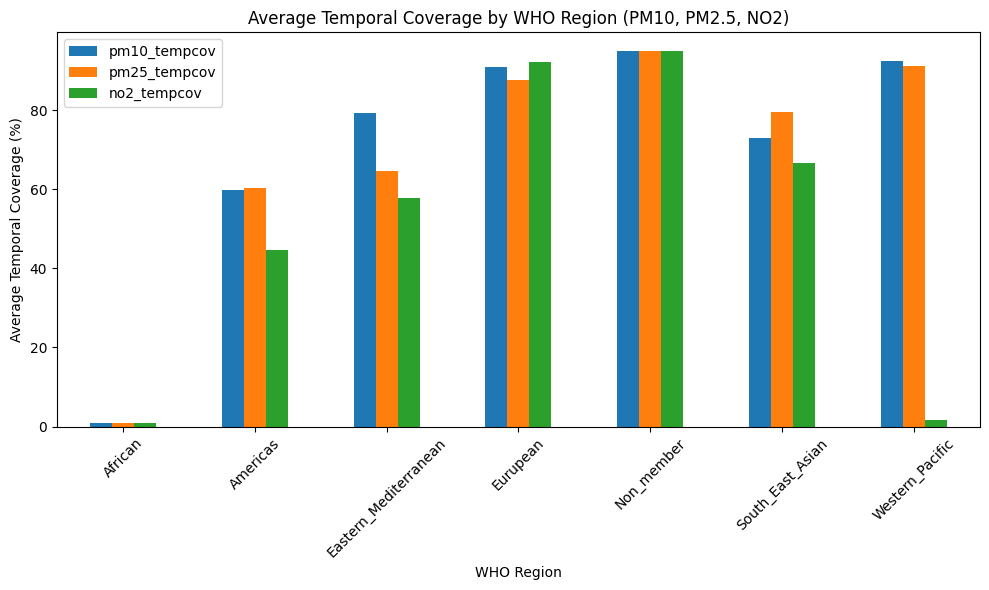

In [75]:
# Calculate the average temporal coverage for each region
avg_tempcov_by_region = df_cleaned.groupby('who_region')[['pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']].mean()

# Plot the temporal coverage by region
avg_tempcov_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Average Temporal Coverage by WHO Region (PM10, PM2.5, NO2)')
plt.xlabel('WHO Region')
plt.ylabel('Average Temporal Coverage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()